In [2]:
import numpy as np
import pandas as pd
from pygmid import Lookup as lk
import matplotlib.pyplot as plt

#### Technology data

In [3]:
table_path = '/home/bmurmann/eda/designs/Book-on-gm-ID-design/starter_files_open_source_tools/ihp-sg13g2/simulation/'
n = lk(table_path+'sg13_lv_nmos.mat')

#### Specifications

In [4]:
av0 = 4; rs = 10e3; cl = 200e-15

#### Design choices

In [18]:
points = 2000
l = 0.13; wfing = 5; gm_id = np.random.uniform(8, 25, points); rd = np.random.uniform(0.5e3, 10e3, points)

#### Sizing and benchmarking

In [19]:
gmrds = n.lookup('GM_GDS', GM_ID=gm_id, L=l)
gm = 1/rd*(1/av0 - 1/gmrds)**-1
id = gm/gm_id 
w = id/n.lookup('ID_W', GM_ID=gm_id, L=l)
nf = 1+np.floor_divide(w, wfing)

# Compute capacitances
cgs = w*n.lookup('CGS_W', GM_ID=gm_id, L=l)
cgd = w*n.lookup('CGD_W', GM_ID=gm_id, L=l)
cdd = w*n.lookup('CDD_W', GM_ID=gm_id, L=l)
cdb = cdd-cgd
cltot = cl+cdb

# Estimate bandwidth
rds = gmrds/gm
rdtot = rds*rd/(rds+rd)
tau1 = rs*(cgs + cgd*(1+av0)) + rdtot*(cltot+cgd)
bw = 1/2/np.pi/tau1

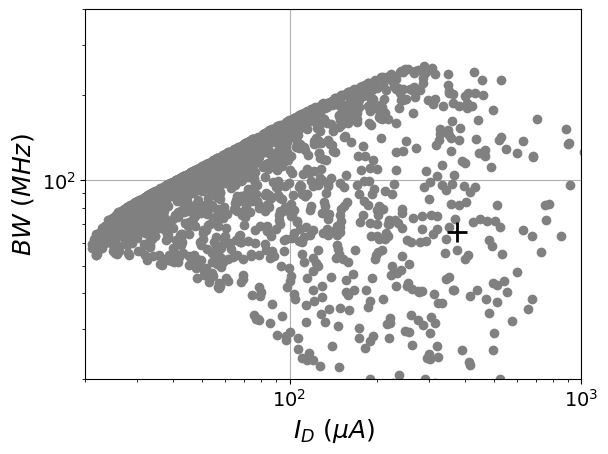

In [20]:
id_ex2 = 376
bw_ex2 = 65.9

plt.loglog(id/1e-6, (bw/1e6), marker='o', markersize=5, markeredgewidth=2, linestyle='None', color='gray')
plt.loglog(id_ex2, bw_ex2, marker='+', markersize=15, markeredgewidth=2, linestyle='None', color='black')
plt.xlim(2e1, 1e3)
plt.ylim(20, 400)
plt.xlabel("$I_D$ ($\\mu A$)", fontsize=18)
plt.ylabel("$BW$ ($MHz$)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()